#### Title: 'Heart disease prediction using Machine Learning'
'Author: ' [Dr. Muhammad Adeel Munir](https://www.linkedin.com/in/muhammad-adeel-munir-b0652b206/)\
'Date: ' 26th April 2024
'Dataset: ' [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

**Context**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Content**
Column Descriptions:\
id (Unique id for each patient)\
age (Age of the patient in years)\
origin (place of study)\
sex (Male/Female)\
cp chest pain type\
typical angina,\
atypical angina,\
non-anginal,\
asymptomatic\
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))\
chol (serum cholesterol in mg/dl)\
fbs (if fasting blood sugar > 120 mg/dl)\
restecg (resting electrocardiographic results)\
-- Values: [normal, stt abnormality, lv hypertrophy]\
thalach: maximum heart rate achieved\
exang: exercise-induced angina (True/ False)\
oldpeak: ST depression induced by exercise relative to rest\
slope: the slope of the peak exercise ST segment\
ca: number of major vessels (0-3) colored by fluoroscopy\
thal: [normal; fixed defect; reversible defect]\
num: the predicted attribute\

**Acknowledgements**
Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Relevant Papers:**
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

**Citation Request:**
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.
Aims and Objective:
We will fill this after doing some exploratory Data Analyis (EDA).

**Import Libraries**
Let's start the project by impoprting all the libraries that we will need in this project.

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer


In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [5]:
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load the dataset
# way 1 (Load the data from csv file)
df = pd.read_csv('D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\heart_disease_uci.csv')

In [8]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
# Exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
df["id"].min(), df["id"].max()

(1, 920)

In [11]:
df["age"].min(), df["age"].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

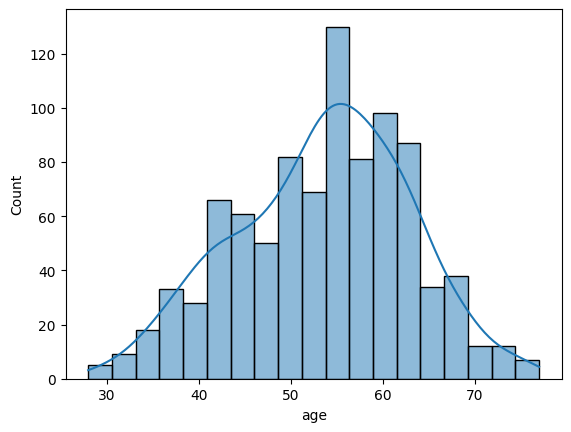

In [12]:
sns.histplot(df["age"], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


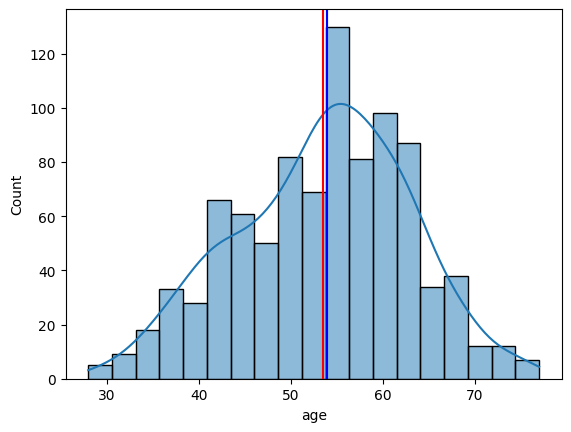

In [13]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [14]:
px.histogram(df, x="age", color="sex")

In [16]:
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [17]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [21]:
df.groupby("sex")["age"].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [22]:
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [23]:
# Lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [24]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

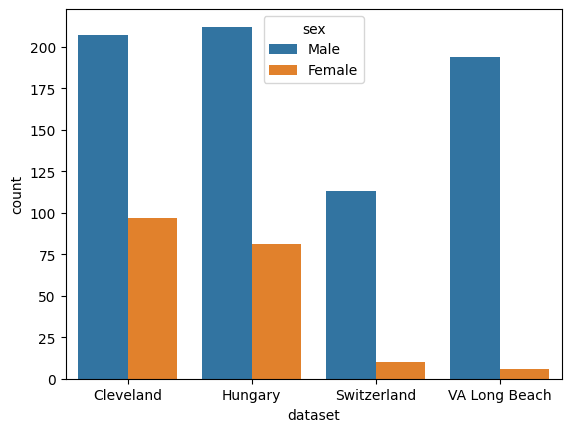

In [25]:
sns.countplot(data=df, x='dataset', hue="sex")

In [29]:
fig=px.bar(df, x="dataset", color='sex')
fig.show()


In [31]:
df.groupby("dataset")["sex"].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

In [34]:
# Make a plot of age columns and coloring by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()


In [35]:
# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


Let's explore cp (Chest Pain) column:

In [36]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

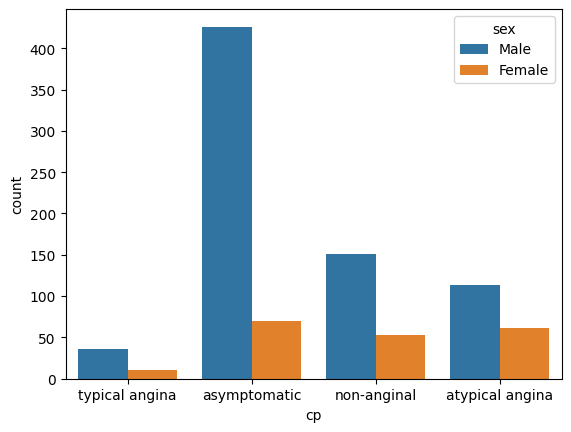

In [37]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

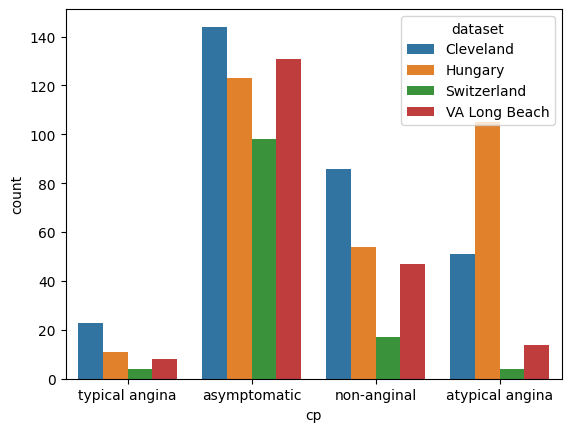

In [38]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [39]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

Let'e explore the trestbps (resting blood pressure) column:

In [40]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

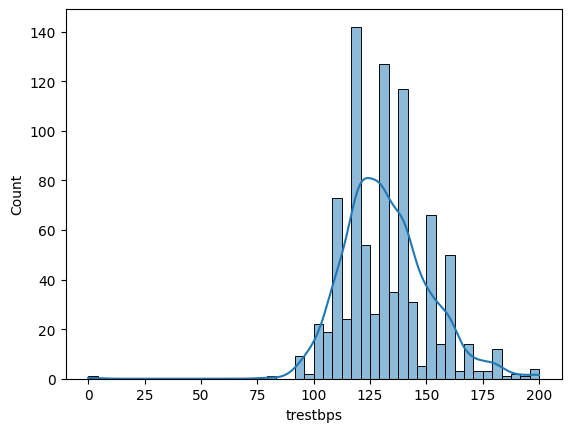

In [41]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

In [42]:
# Deal with missing values in trestbps column
# find the percentage of missing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


In [44]:
# impute the missing values of trestbps column using iterative imputer
# create an object of iterative imputer
imputer_1 = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer on trestbps column
imputer_1.fit_transform(df[['trestbps']])


# check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [46]:
# impute missing values using iterative imputer for ca, oldpeak, thalch , chol columns 
# create an object of iterative imputer
imputer_2 = IterativeImputer(max_iter=10, random_state=42)
# fit_transform the imputer on ca, oldpeak, thal , chol columns
df['ca'] = imputer_2.fit_transform(df[['ca']])
df['oldpeak'] = imputer_2.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_2.fit_transform(df[['thalch']])
df['chol'] = imputer_2.fit_transform(df[['chol']])

In [54]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

The missing values in thal column are: 486


In [55]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Missing Values Imputation Function using ML
**Steps:**
import Libraries

Load the data

find the columns with missing values and store in an object

find the columns based on data type

numeric

Categoricals

Boolean

Define the function to impute missing values

apply the function to our dataset with missing values

check the missing values after imputation

In [68]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, mean_squared_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [59]:
# load the dataset
# way 1 (Load the data from csv file)
df = pd.read_csv('D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\heart_disease_uci.csv')

In [69]:

missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [70]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [66]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [79]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [73]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [72]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.29208092485549 

RMSE = 17.054275293320053 

R2 = 0.09187771022082125 

Missing Values chol : 3.26%
MAE = 44.87904494382022 

RMSE = 63.506905963494866 

R2 = 0.6805075831580218 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.83450867052023 

RMSE = 21.54401150649311 

R2 = 0.32509529111450053 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.564813953488372 

RMSE = 0.8016009924911462 

R2 = 0.38782662334672036 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.92 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [74]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**Dealing with Outliers**

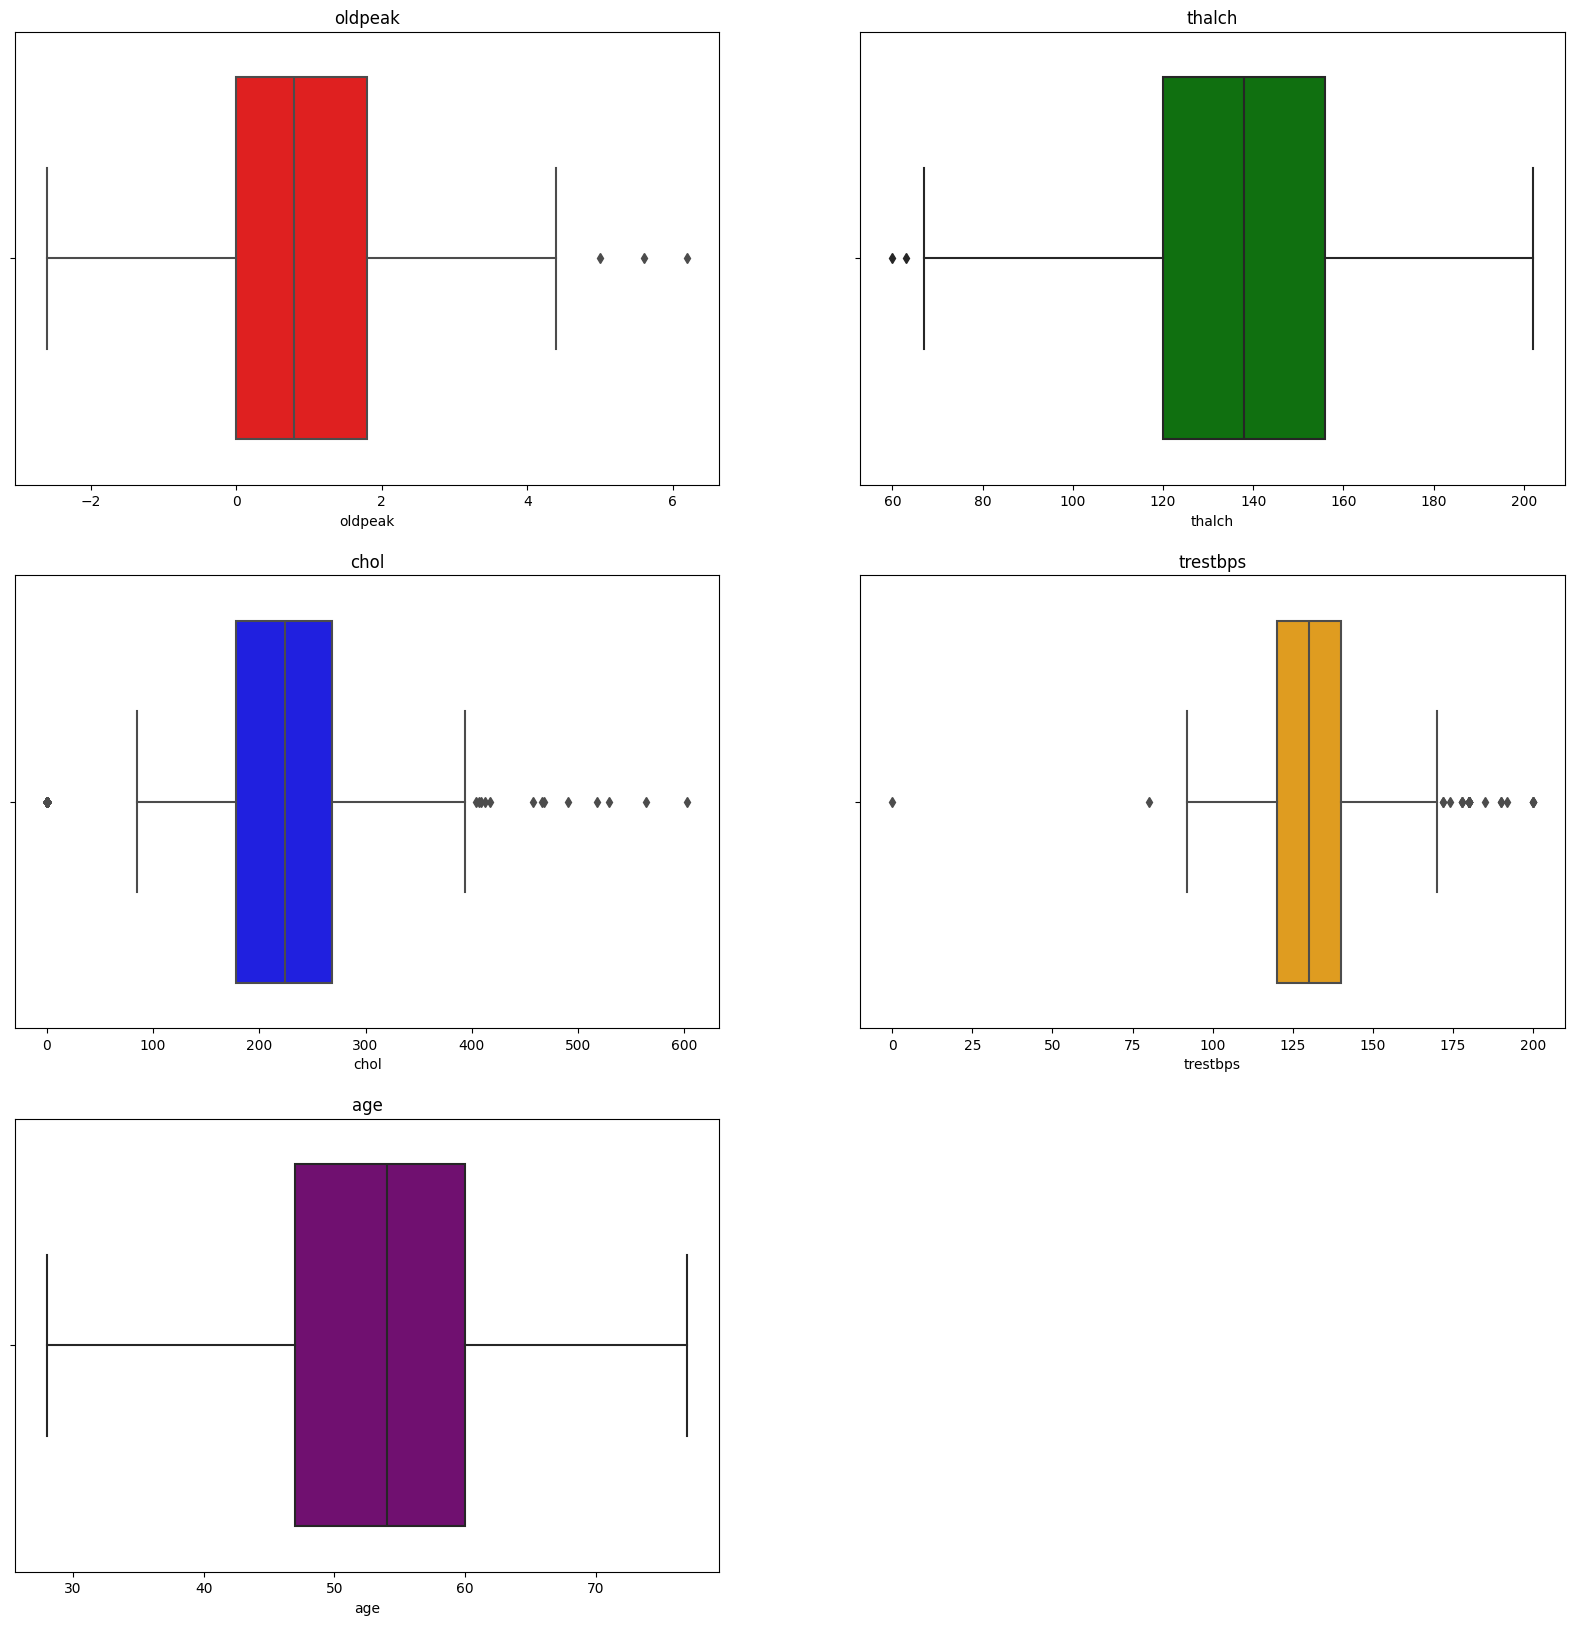

In [82]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [83]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [84]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]